In [ ]:
from google.colab import files
uploaded = files.upload()



Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

# Automatically take the name of the uploaded zip file
zip_path = list(uploaded.keys())[0]
extract_path = "/content/garbage_dataset"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)



✅ Extracted to: /content/garbage_dataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Training data
train_data = datagen.flow_from_directory(
    "/content/garbage_dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_data = datagen.flow_from_directory(
    "/content/garbage_dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4044 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Get the number of classes from the training data
num_classes = train_data.num_classes

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # You can try 15 or 20 if Colab permits
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.4975 - loss: 0.7125 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.4957 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.5076 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.5115 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4900 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 127s 999ms/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.4894 - loss: 0.6932 - val_a

In [ ]:
import zipfile
import os

# Step 1: Define your file path
zip_path = "/content/archive.zip"  # if you uploaded it to Colab directly

# Step 2: Make a target directory
extract_path = "/content/clean_garbage"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Step 3: Filter and extract only files under "garbage classification/"
    for file in zip_ref.namelist():
        if file.startswith("garbage classification/") and file.count('/') == 2:
            zip_ref.extract(file, extract_path)

# Step 4: Final path should be:
final_data_path = "/downloads/clean_garbage/garbage classification"

# Step 5: List folders to confirm
!ls "$final_data_path"


ls: cannot access '/content/clean_garbage/garbage classification': No such file or directory


In [ ]:
import zipfile
import os

zip_path = "/content/archive.zip"  # Make sure this matches your uploaded filename
extract_to = "/content/clean_garbage"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Now list all folders inside clean_garbage
!find /content/clean_garbage -type d


/content/clean_garbage
/content/clean_garbage/Garbage classification
/content/clean_garbage/Garbage classification/Garbage classification
/content/clean_garbage/Garbage classification/Garbage classification/trash
/content/clean_garbage/Garbage classification/Garbage classification/plastic
/content/clean_garbage/Garbage classification/Garbage classification/glass
/content/clean_garbage/Garbage classification/Garbage classification/paper
/content/clean_garbage/Garbage classification/Garbage classification/metal
/content/clean_garbage/Garbage classification/Garbage classification/cardboard
/content/clean_garbage/garbage classification
/content/clean_garbage/garbage classification/Garbage classification
/content/clean_garbage/garbage classification/Garbage classification/trash
/content/clean_garbage/garbage classification/Garbage classification/plastic
/content/clean_garbage/garbage classification/Garbage classification/glass
/content/clean_garbage/garbage classification/Garbage classifica

In [ ]:
data_path = "/content/clean_garbage/garbage classification"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2022 images belonging to 1 classes.
Found 505 images belonging to 1 classes.


In [ ]:
!find /content/clean_garbage -type d


/content/clean_garbage
/content/clean_garbage/Garbage classification
/content/clean_garbage/Garbage classification/Garbage classification
/content/clean_garbage/Garbage classification/Garbage classification/trash
/content/clean_garbage/Garbage classification/Garbage classification/plastic
/content/clean_garbage/Garbage classification/Garbage classification/glass
/content/clean_garbage/Garbage classification/Garbage classification/paper
/content/clean_garbage/Garbage classification/Garbage classification/metal
/content/clean_garbage/Garbage classification/Garbage classification/cardboard
/content/clean_garbage/garbage classification
/content/clean_garbage/garbage classification/Garbage classification
/content/clean_garbage/garbage classification/Garbage classification/trash
/content/clean_garbage/garbage classification/Garbage classification/plastic
/content/clean_garbage/garbage classification/Garbage classification/glass
/content/clean_garbage/garbage classification/Garbage classifica

In [ ]:
/content/clean_garbage/garbage classification/Garbage classification


NameError: name 'content' is not defined

In [ ]:
data_path = "/content/clean_garbage/garbage classification/Garbage classification"


In [ ]:
data_path = "/content/clean_garbage/garbage classification/Garbage classification"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes!
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 825ms/step - accuracy: 0.2589 - loss: 2.6800 - val_accuracy: 0.4254 - val_loss: 1.4742
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 54s 832ms/step - accuracy: 0.4960 - loss: 1.2855 - val_accuracy: 0.3777 - val_loss: 1.5111
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 823ms/step - accuracy: 0.6578 - loss: 0.9633 - val_accuracy: 0.4533 - val_loss: 1.3465
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 824ms/step - accuracy: 0.6974 - loss: 0.8183 - val_accuracy: 0.4891 - val_loss: 1.3700
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 815ms/step - accuracy: 0.7776 - loss: 0.6486 - val_accuracy: 0.4891 - val_loss: 1.4092
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 82s 819ms/step - accuracy: 0.8531 - loss: 0.4442 - val_accuracy: 0.4871 - val_loss: 1.5458
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 820ms/step - accuracy: 0.9067 - loss: 0.3218 - val_accuracy: 0.5089 - val_loss: 1.6620
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 822ms/step - accuracy: 0.9357 - loss: 0.2299 - val_accu

In [ ]:
import os

for class_folder in os.listdir(data_path):
    count = len(os.listdir(os.path.join(data_path, class_folder)))
    print(f"{class_folder}: {count} images")


trash: 137 images
plastic: 482 images
glass: 501 images
paper: 594 images
metal: 410 images
cardboard: 403 images


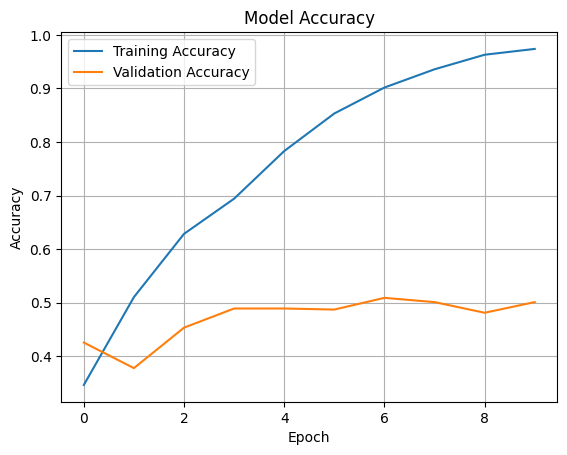

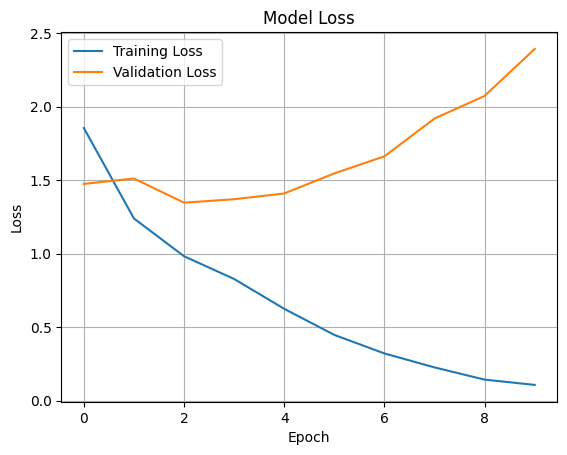

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.add(Dropout(0.5))


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(..., callbacks=[early_stop])


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       # watches validation loss
    patience=3,               # stops if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]    # 👈 added callback here
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 880ms/step - accuracy: 0.9850 - loss: 0.0700 - val_accuracy: 0.5229 - val_loss: 2.4340
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 844ms/step - accuracy: 0.9852 - loss: 0.0536 - val_accuracy: 0.5408 - val_loss: 2.4922
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 54s 848ms/step - accuracy: 0.9972 - loss: 0.0268 - val_accuracy: 0.5169 - val_loss: 2.6610
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 863ms/step - accuracy: 0.9949 - loss: 0.0228 - val_accuracy: 0.5089 - val_loss: 2.8859


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(128, 128, 3)),  # 👈 Add this line as the first layer

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


In [ ]:
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,094 (28.20 MB)

 Trainable params: 7,393,094 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model first!
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Then define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Now train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 60s 900ms/step - accuracy: 0.2128 - loss: 3.3462 - val_accuracy: 0.3221 - val_loss: 1.7142
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 855ms/step - accuracy: 0.3761 - loss: 1.5337 - val_accuracy: 0.3638 - val_loss: 1.5752
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 865ms/step - accuracy: 0.4491 - loss: 1.3623 - val_accuracy: 0.4215 - val_loss: 1.5370
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 863ms/step - accuracy: 0.4939 - loss: 1.3090 - val_accuracy: 0.4036 - val_loss: 1.3899
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 867ms/step - accuracy: 0.5323 - loss: 1.2233 - val_accuracy: 0.4732 - val_loss: 1.3449
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 57s 887ms/step - accuracy: 0.6063 - loss: 1.0849 - val_accuracy: 0.4891 - val_loss: 1.3145
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 867ms/step - accuracy: 0.5990 - loss: 1.0513 - val_accuracy: 0.5149 - val_loss: 1.3154
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 56s 868ms/step - accuracy: 0.6250 - loss: 0.9755 - val_accu

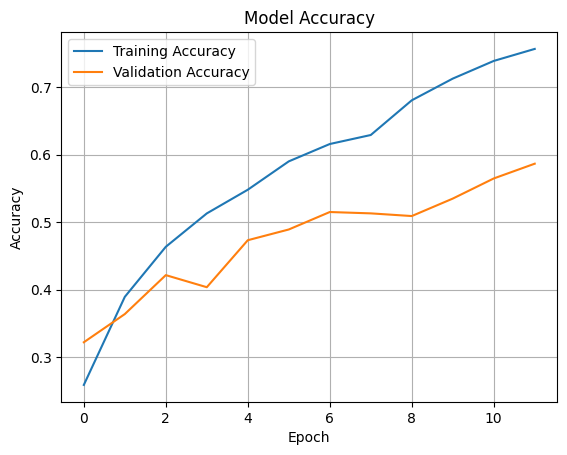

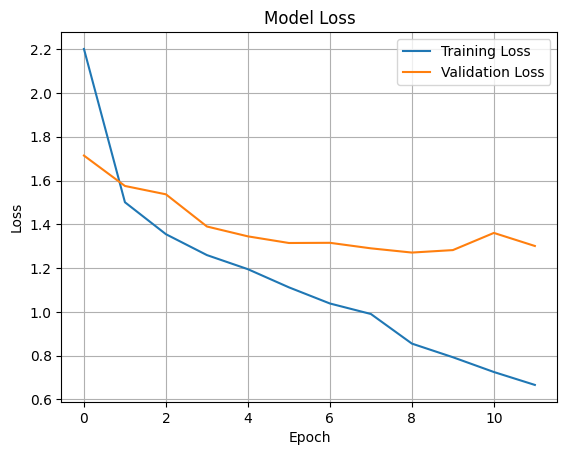

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
Conv2D(32, (3,3), activation='relu'),
MaxPooling2D(2,2),
Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(2,2),


(<MaxPooling2D name=max_pooling2d_14, built=True>,)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
!pwd
!ls -lh


/content
total 4.0K
drwxr-xr-x 1 root root 4.0K Jun 12 13:36 sample_data


In [14]:
!ls -lh /content/sample_data/content/


ls: cannot access '/content/sample_data/content/': No such file or directory


In [15]:
!ls -lh /content/


total 4.0K
drwxr-xr-x 1 root root 4.0K Jun 12 13:36 sample_data


In [16]:
!ls -lh /content/archive.zip


ls: cannot access '/content/archive.zip': No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()
